### Libraries

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import time
from tqdm.notebook import tnrange, tqdm
import os

### Inputs parameters

In [2]:
Ntsteps = 1800
Ninterfaces = 63
Nx = 64
Ny = Nx
Nr = 100
L = 1000.
dx = L/Nx
dy = dx

In [3]:
# run_name = 'Run_no_zero_flow_Run_1610993549'./../../MC_runs/Run_no_zero_flow_no_oscilations_Run_Run_1620834677/MC/runs/
folder_name = './../../MC_runs/Run_no_zero_flow_no_oscilations_Run_Run_1623326650/MC/runs/'

### Create aux variables

In [4]:
k=np.zeros(Nx*Ny)
qcell = np.zeros((Ny,Ntsteps))
q_x = np.zeros((Nr,Ntsteps))
q_y = np.zeros((Nr,Ntsteps))

HMC = np.zeros((Nr+2,Nx,Ntsteps))

In [5]:
def harm_2(a,b):
    
    harm = 1/a+1/b
    harm = 2/harm
    
    return harm

In [6]:
q_tot_x = list()
q_tot_y = list()

for ir in tnrange(1,101):
#     print(ir)
    #     time.sleep(10)
    f = open(f'./{folder_name}/{ir}/6_months_run.hed')
    f_k = open(f'./{folder_name}/{ir}/karray_1.0.txt')

    hmc = np.loadtxt(f)
    K = np.loadtxt(f_k)

    P = hmc.reshape((Ntsteps,64,64))
    K = K.reshape((64,64)) 

    dP_x_u = P[:,15:3*16:16, 15:3*16:16] - P[:,15:3*16:16, 15+1:3*16+1:16]
    k_x_u = harm_2(K[15:3*16:16,15:3*16:16],K[15:3*16:16,15+1:3*16+1:16])

    dP_x_d = P[:,15+1:4*16:16, 15:3*16:16] - P[:,15+1:4*16:16, 15+1:3*16+1:16]
    k_x_d = harm_2(K[15+1:4*16:16,15:3*16:16],K[15+1:4*16:16,15+1:3*16+1:16])


    q_x = (dP_x_u*k_x_u+dP_x_d*k_x_d)/(2*dx)





    dP_y_l = P[:,15:3*16:16, 15:3*16:16] - P[:,15+1:3*16+1:16, 15:3*16:16]
    k_y_l = harm_2(K[15:3*16:16,15:3*16:16],K[15+1:3*16+1:16,15:3*16:16])

    dP_y_r = P[:,15:3*16:16, 15+1:3*16+1:16] - P[:,15+1:4*16:16, 15+1:3*16+1:16]
    k_y_r = harm_2(K[15:3*16:16,15+1:3*16+1:16],K[15+1:4*16:16,15+1:3*16+1:16])


    q_y = (dP_y_l*k_y_l+dP_y_r*k_y_r)/(2*dx)

    q_tot_x.append(q_x)
    q_tot_y.append(q_y)


FileNotFoundError: [Errno 2] No such file or directory: '././../../MC_runs/Run_no_zero_flow_no_oscilations_Run_Run_1623326650/MC/runs//1/6_months_run.hed'

### Save parameters

In [ ]:
q_x_list = np.reshape(np.array(q_tot_x),(100,1800,9))
q_y_list = np.reshape(np.array(q_tot_y),(100,1800,9))

In [ ]:
os.mkdir(f'./{folder_name}/../flow')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: '././../../MC_runs/Run_no_zero_flow_no_oscilations_Run_Run_1623326650/MC/runs//../flow'

In [ ]:
for i in range(0,9):
    
    np.savetxt(f'./{folder_name}/../flow/Q_x_{i+1}.txt',q_x_list[:,:,i])

In [ ]:
for i in range(0,9):
    
    np.savetxt(f'./{folder_name}/../flow/Q_y_{i+1}.txt',q_y_list[:,:,i])

In [ ]:


# np.savetxt(f'./{folder_name}/exitq_x_check.txt',np.reshape(np.array(q_tot_x),(1,-1)))
# np.savetxt(f'./{folder_name}/exitq_y_check.txt',np.reshape(np.array(q_tot_y),(1,-1)))

In [ ]:
folder_name

'./../../MC_runs/Run_no_zero_flow_no_oscilations_Run_Run_1623326650/MC/runs/'

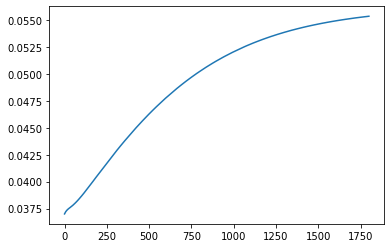

In [ ]:
plt.plot(np.mean(q_x_list,axis=0)[:,4]/((P[:,0,0]-1)/1000))

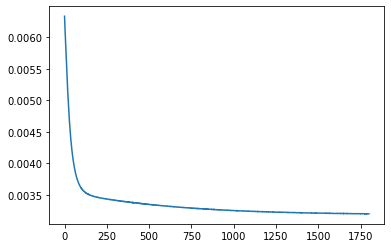

In [ ]:
plt.plot(np.mean(q_y_list,axis=0)[:,4]/((P[:,0,0]-P[:,-1,0])/1000))

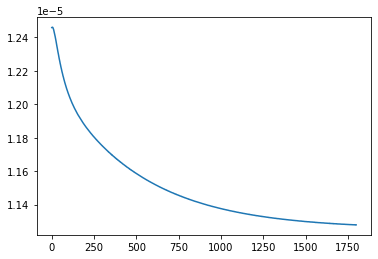

In [ ]:
plt.plot(np.mean(q_x_list,axis=0)[:,4])

In [ ]:
K_X = np.mean(q_x_list,axis=0)[:,4]/((P[:,32,0]-1)/1000)

In [ ]:
np.savetxt(f'./{folder_name}/../flow/K_X.txt',K_X)

In [ ]:
K_Y = np.mean(q_y_list,axis=0)[:,4]/((P[:,0,0]-P[:,-1,0])/1000)
np.savetxt(f'./{folder_name}/../flow/K_Y.txt',K_Y)

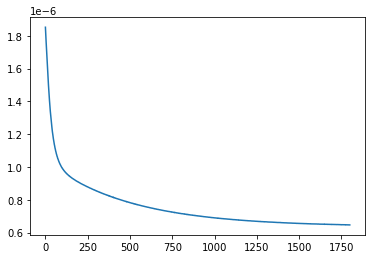

In [ ]:
plt.plot(np.mean(q_y_list,axis=0)[:,4])

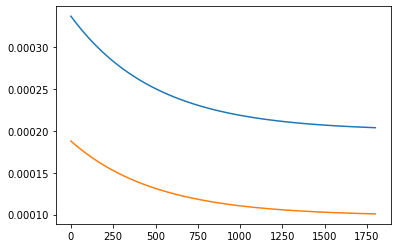

In [ ]:
plt.plot((P[:,0,0]-1)/1000)
plt.plot((P[:,32,0]-1)/1000)